<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

# Проект: Исследовательский анализ данных

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Проект нужно всегда начинать с описания. За основу можно взять описание из задания. Распиши что за данные, какие цели и задачи, можно написать план выполнения проекта.

Имея архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Ознакомимся с данными

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим описание столбцов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы каждого поля

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

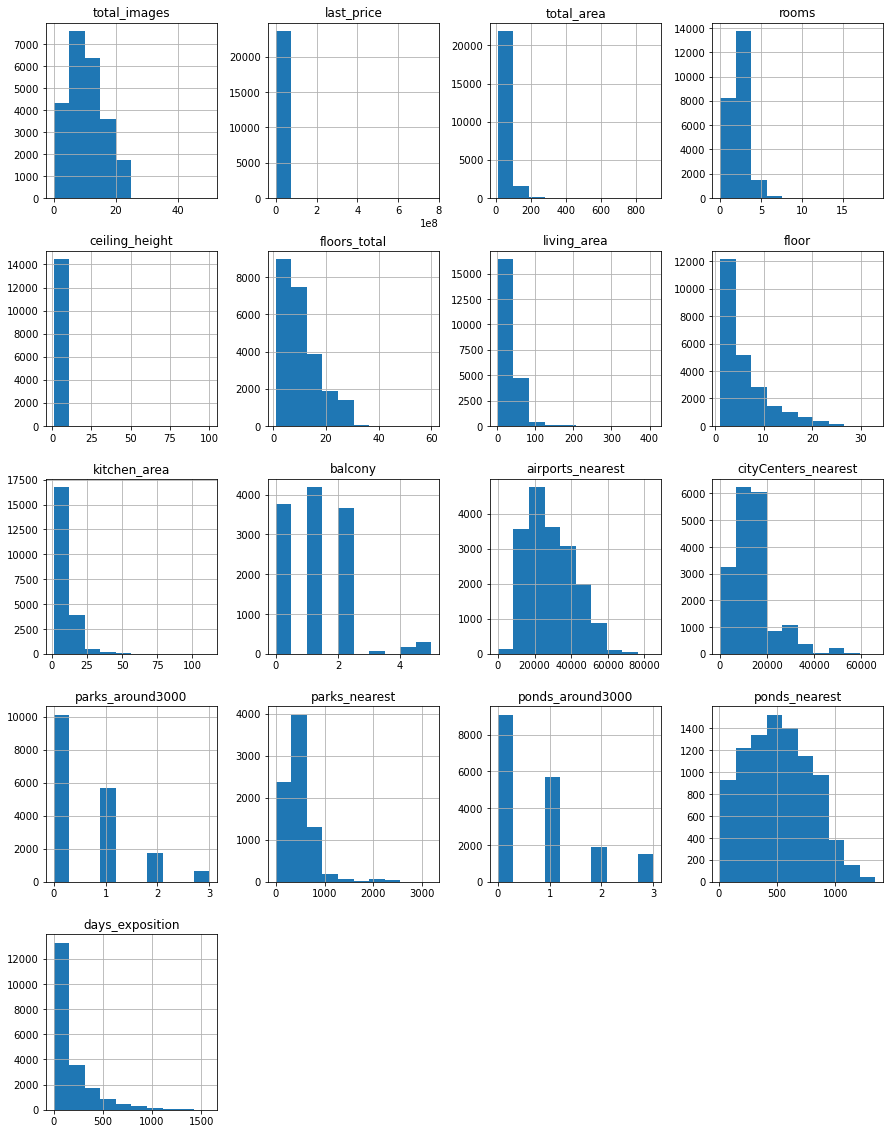

In [5]:
df.hist(figsize=(15, 20))

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> После того, как ты рассмотрел данные, стоит составить их краткое описание.

На первый взгляд некоторые гистограммы выглядят подозрительно, потому что значения сосредоточены в левой части графиков. Это может быть как особенность данного параметра, так и какие-либо аномалии в данных. С этим разберемся на следующих шагах.

### Шаг 2. Предобработка данных

#### Пропуски

Посмотрим в каких полях содержаться пропущенные значения

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поля, в которых можно заполнить пропущенные значения
- balcony если продавец не указал число балконов, то, скорее всего, в его квартире их нет и пропущенные значения можно заменить на 0
- parks_around3000 если пропущено число парков, то, скорее всего, поблизости их нет и пропущенные значения можно заменить на 0
- ponds_around3000 если пропущено число водоемов поблизости, то, скорее всего, поблизости их нет и пропущенные значения можно заменить на 0
- is_apartment вероятнее всего, квартиры с пропущенными значениями не являются аппартаментами и продавец просто это не указывал, поэтому проппуски можно заполнить отрицательным значением
- ceiling_height пропуски можно заполнить медианой
- Пропуски в площади кухни и жилой площади заполним, с помощью коэффициента их отношения к общей площади

In [7]:
df['balcony'] = df['balcony'].fillna(value=0)
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

living_area_coef = df['living_area'].median() / df['total_area'].median()
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] * living_area_coef

kitchen_area_coef = df['kitchen_area'].median() / df['total_area'].median()
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] * kitchen_area_coef

Поля, которые необходимо преобразовать в другой тип
- first_day_exposition (object в datetime)
- is_apartment (object в bool) потому что поле может принимать только два значения
- balcony (float в int, потому что количество балконов целое число)
- parks_around3000 (float в int, потому что количество парков поблизости целое число)
- ponds_around3000 (float в int, потому что количество водоемов поблизости целое число)

In [8]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S"
)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Пропуски правильно обработал в параметрах выше, корректное предположение при заполнении пропусков. Типы данных тоже верно обработал.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Почему ты не обработал пропуски в других параметрах? Нужно объяснить почему пропуски нельзя обработать.
    
Пропуски в высоте потолков обработать можно, это типовые значения, пропуски можно заполнить медианой.
    
Пропуски в площади кухни и жилой площади также можно обработать. Эти параметры сильно коррелируют с общей площадью, можно посчитать коэффициент отношения жилой площади к общей и с его помощью восстановить пропуски. Аналогично и площадь кухни.

#### Неявные дубликаты

Изучим уникальные значения в столбце с названиями местоположения

In [9]:
df["locality_name"].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видно, что содержится много дубликатов, причиной которых является использвание символов 'е' и 'ё'. Также есть дубликаты из-за разного указания статуса населенного пункта, например, «поселок Рябово» и «поселок городского типа Рябово». Чтобы исключить это, добавим новый столбец "clean_name", где будет содержатся только название населенных пунктов

In [10]:
stopwords = ['городской', 'городского', 'типа', 'посёлок', 'коттеджный',
             'поселок', 'деревня', 'при', 'железнодорожной', 'станции',
            'садоводческое', 'некоммерческое', 'товарищество', 'садовое', 'село']
new_words = []
stopword_re = re.compile("|".join(r"\b%s\b" % re.escape(word) for word in stopwords))
df["clean_name"] = df["locality_name"].replace(stopword_re, "")
df["clean_name"] = df[~df["clean_name"].isna()]["clean_name"].str.strip()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Не хватает проверки обработки. Всегда после тогго, как ты обрабатываешь данные, нужно смотреть на результат обработки, вдруг что то отработало некорректно?

In [11]:
df["clean_name"].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Успех, удалось оставить только названия поселков.

#### Аномальные значения

Проанализировав гистограммы, можем предположить и исследовать на аномальные значения следующие поля:
- last_price
- total_area
- rooms
- ceiling_height
- balcony

Проанализируем квартиры с высокими ценами на аномальность

In [12]:
df[df["last_price"] > 2e8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_name
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.000000,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0,Санкт-Петербург
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,288.461538,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0,Санкт-Петербург
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.000000,10,False,...,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,Санкт-Петербург
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.000000,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0,Санкт-Петербург
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.000000,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.000000,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.800000,4,False,...,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.700000,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.700000,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,Санкт-Петербург


Из выборки видно, что вероятнее всего это элитные квартиры, так как имеют большую площадь с высокими потолками, находятся в черте города. Однозначно сказать, что это выбросы нельзя, поэтому пока оставим как есть

Проанализируем квартиры с большими площадями на анамальность

In [13]:
df[df["total_area"] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clean_name
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,364.038462,5,False,...,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.000000,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN,Санкт-Петербург
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.000000,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,Санкт-Петербург
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.500000,7,True,...,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0,Санкт-Петербург
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.300000,4,False,...,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.000000,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.700000,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,Санкт-Петербург


С площадью такая же картина, как и с ценой. Оставим пока как есть

Посмотрим на комнаты. Количество квартир с больше чем 7 комнат незначительное, да и варианты с бОльшим количеством комнат выглядят очень подозрительно, поэтому решено создать дополнительный столбец и объединить эти квартиры в группу 7+ комнат

In [14]:
df["rooms_count_group"] = df["rooms"]
df['rooms_count_group'] = df['rooms_count_group'].astype('str')
df.loc[(df["rooms"] >= 7), 'rooms_count_group'] = '7+'

Проанализируем высоту потолков. Найдем и удалим редкие и выбивающиеся значения. Потолки меньше 2.4-х и больше 32-х метров, а также в диапазоне (6, 20)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Выбросы нужно удалять из датафрейма, пытаться сохранять эти данные не стоит, их количество вряд ли поможет получить более корректные результаты, скорее наоборот получится искаженная картина.

In [15]:
ceiling_condition = ((df["ceiling_height"] < 2.4) | (df["ceiling_height"] > 32)) | ((df["ceiling_height"] >= 6) & (df["ceiling_height"] <= 24))
df.drop(df[ceiling_condition].index, inplace = True)

Поправим значения в диапазоне 24 - 32, вероятнее всего это диапазон 2.4 - 3.2

In [16]:
df.loc[(df["ceiling_height"] > 24), 'ceiling_height'] = df.loc[(df['ceiling_height'] > 24), 'ceiling_height'] / 10

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Возможные опечатки обработал правильно.

### Шаг 3. Добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [17]:
df['price_per_meter'] = df['last_price'] / df['total_area']

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [18]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Месяц публикации объявления

In [19]:
df['month'] = df['first_day_exposition'].dt.month

Год публикации объявления

In [20]:
df['year'] = df['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [21]:
def floor_group(data):
    """
    Возвращает тип этажа квартиры
    """
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой' 

df['floor_group'] = df.apply(floor_group, axis=1)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [22]:
df["cityCenters_nearest_km"] = (df["cityCenters_nearest"] / 1000).round()

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Новые столбцы создал правильно, использовал подходящие методы для этого, так держать!

### Шаг 4. Проведите исследовательский анализ данных:

#### Общая площадь

<AxesSubplot:>

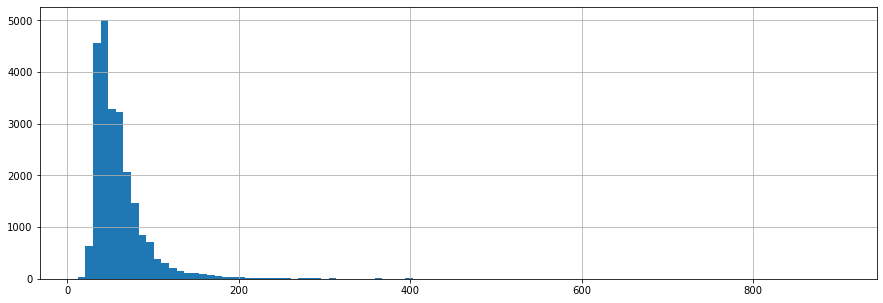

In [23]:
df['total_area'].hist(bins=100, figsize=(15, 5))

Здесь и далее, будем исключать из графика большие редкие значения, чтобы видеть более подробно картину распределения в наиболее частых случаях

<AxesSubplot:>

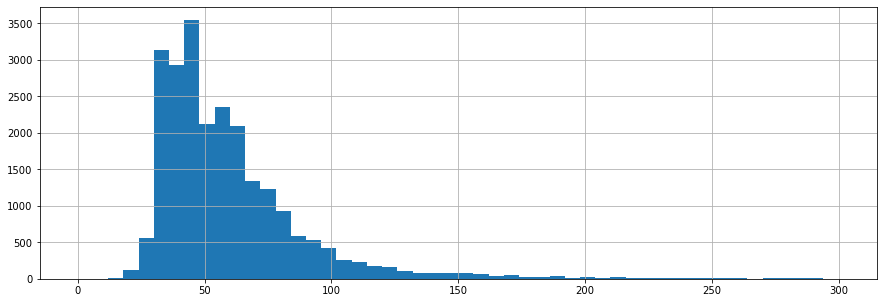

In [24]:
df['total_area'].hist(bins=50, figsize=(15, 5), range=(0, 300))

count    23667.000000
mean        60.359241
std         35.661223
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

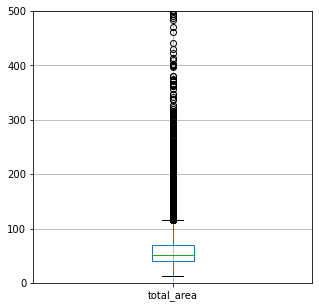

In [89]:
df.boxplot(figsize=(5, 5), column='total_area')

plt.ylim(0, 500)
df['total_area'].describe()

Среднее значение - 60, медиана - 52.

#### Жилая площадь

<AxesSubplot:>

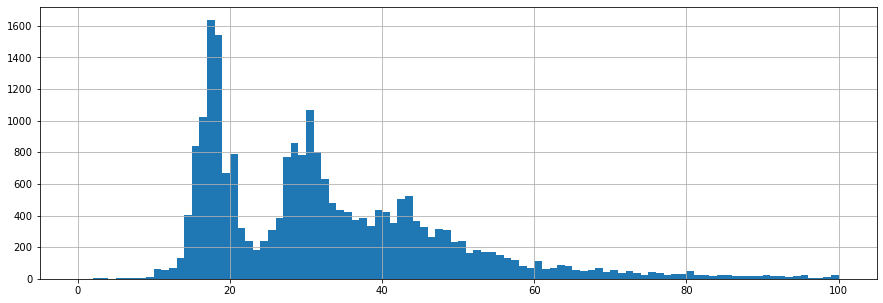

In [26]:
df['living_area'].hist(bins=100, figsize=(15, 5), range=(0, 100))

Неожиданно, в распределении видим несколько пиков. Можно предположить, что эти пики коррелируют с количеством комнат. Проверим, построим гистограмму, разделив цветами квартиры с разным количеством комнат

<AxesSubplot:ylabel='Frequency'>

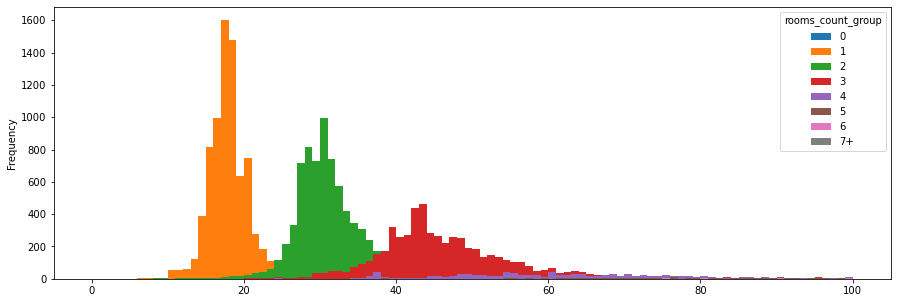

In [27]:
df.pivot(columns='rooms_count_group', values='living_area').plot.hist(bins=100, figsize=(15, 5), range=(0, 100))

In [28]:
print(df[df['rooms_count_group'] == '1']['living_area'].describe())
print(df[df['rooms_count_group'] == '2']['living_area'].describe())
print(df[df['rooms_count_group'] == '3']['living_area'].describe())

count    8034.000000
mean       18.296884
std         4.989622
min         3.000000
25%        16.100000
50%        17.884615
75%        19.300000
max       285.057692
Name: living_area, dtype: float64
count    7930.000000
mean       31.831460
std         6.469018
min         2.000000
25%        28.000000
50%        30.500000
75%        34.000000
max       113.076923
Name: living_area, dtype: float64
count    5806.000000
mean       47.380411
std        11.965042
min         3.000000
25%        40.907885
50%        44.900000
75%        51.300000
max       209.480769
Name: living_area, dtype: float64


Действительно, каждый пик - это отдельное распределение для квартир с разной "комнатностью". Пик для 1, 2-х и 3-х комнатные квартиры приходится на 18, 30 и 45 кв. м. соответсвенно. Однако в распределении с общей площадью, такая зависимость прослеживается слабо.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что дополнительно проверил эту зависимость, интересная закономерность объясняется количеством комнат.

#### Площадь кухни

<AxesSubplot:>

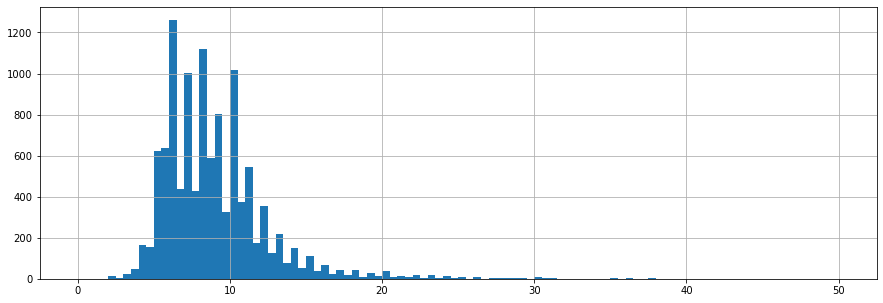

In [85]:
df[df['living_area'] < 30]['kitchen_area'].hist(bins=100, figsize=(15, 5), range=(0, 50))

count    23667.000000
mean        10.508541
std          6.042097
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

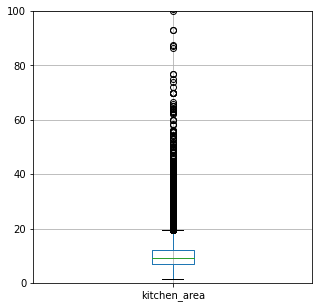

In [88]:
df.boxplot(figsize=(5, 5), column='kitchen_area')

plt.ylim(0, 100)
df['kitchen_area'].describe()

Распределение выглядит довольно странно, зубчато. Корреляции с комнатностью, этажностью найдено не было. Вероятно это особенности выгрузки

#### Цена объекта

<AxesSubplot:>

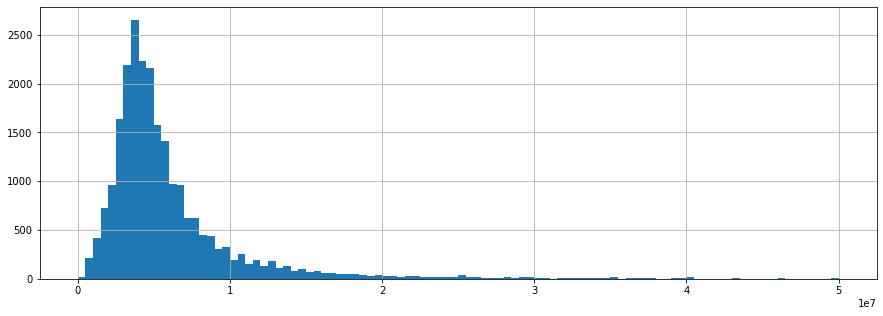

In [30]:
df['last_price'].hist(bins=100, figsize=(15, 5), range=(0, 5e7))

count    2.366700e+04
mean     6.540098e+06
std      1.086888e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

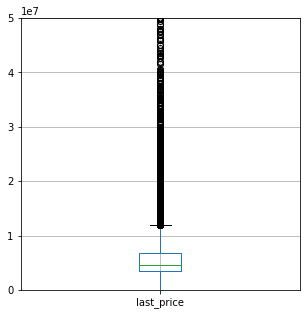

In [91]:
df.boxplot(figsize=(5, 5), column='last_price')

plt.ylim(0, 5e7)
df['last_price'].describe()

В среднем квартиры продаются за 6,5 млн., однако медианой является значение в 4,65 млн.

#### Количество комнат

<AxesSubplot:>

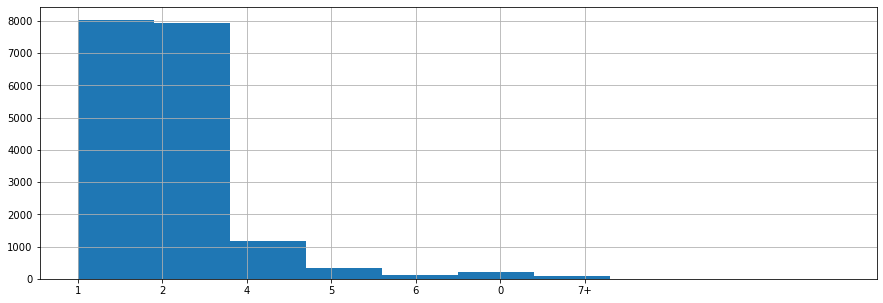

In [32]:
df['rooms_count_group'].hist(bins=10, figsize=(15, 5), range=(1, 10))

In [33]:
df['rooms'].describe()

count    23667.000000
mean         2.070858
std          1.078633
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Пик приходится на 1 и 2-х комнатные квартиры. Так и есть, это самые популярные квартиры

#### Высота потолков

<AxesSubplot:>

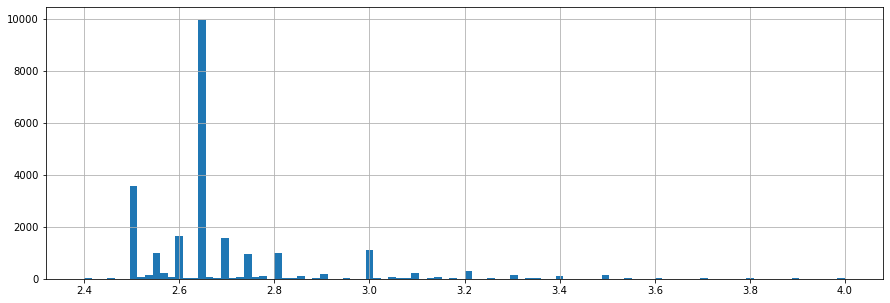

In [34]:
df['ceiling_height'].hist(bins=100, figsize=(15, 5), range=(2.4, 4))

Набляюдаем несколько вершин. Эти пики сооответсвуют стандартам потолков 2.5, 2.6, 2.7, 2.8, 3 и 3.2 метра

#### Этаж квартиры

<AxesSubplot:>

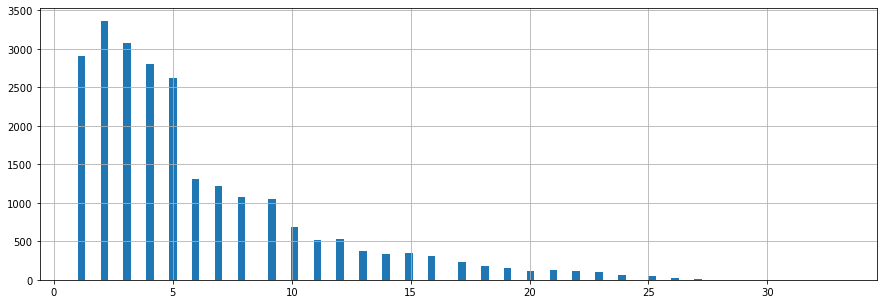

In [35]:
df['floor'].hist(bins=100, figsize=(15, 5))

Вообще распределение этажа квартиры ожидалось равномерным. Но корректировки вносит этажность дома. Попробуем разделить гистограмму по этому показателю. Во избежание долгих расчетов, ограничемся 16-ю этажами.

<AxesSubplot:ylabel='Frequency'>

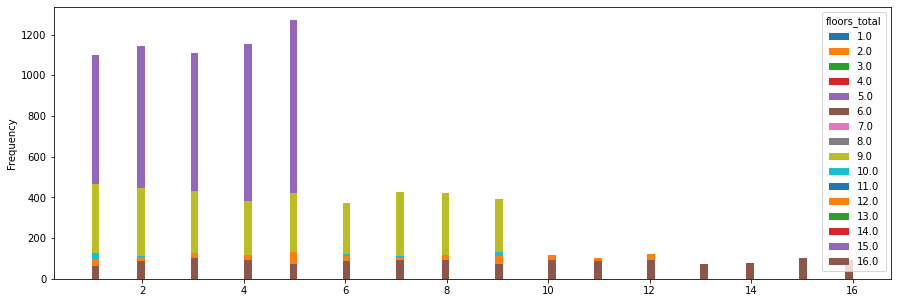

In [36]:
df[df['floors_total'] <= 16].pivot(columns='floors_total', values='floor').plot.hist(bins=100, figsize=(15, 5))

Действительно, распределение получилось равномерным для каждой этажности

#### Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

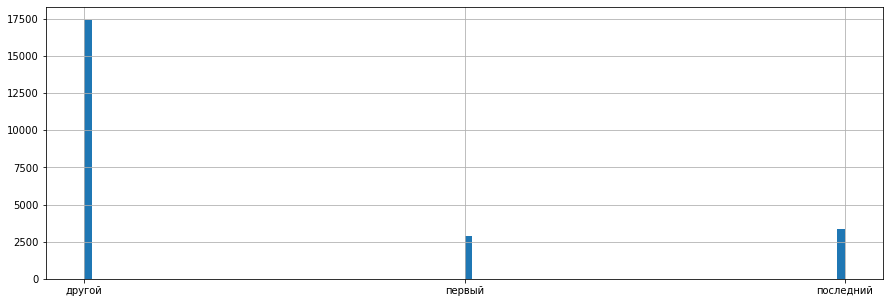

In [37]:
df['floor_group'].hist(bins=100, figsize=(15, 5))

"Другой" этаж встречается чаще чем первый и последний, ожидаемо...

#### Общее количество этажей в доме

<AxesSubplot:>

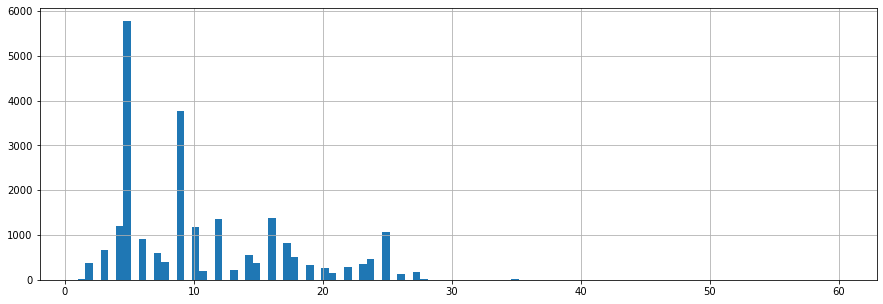

In [38]:
df['floors_total'].hist(bins=100, figsize=(15, 5))

Здесь видим несколько пиков. Объясняется это тем, что какие-то типовые дома встречаются чаще, чем другие, напрмер, это 5-ти, 9-ти, 16-ти и 25-ти этажки.

#### Расстояние до центра города в метрах

<AxesSubplot:>

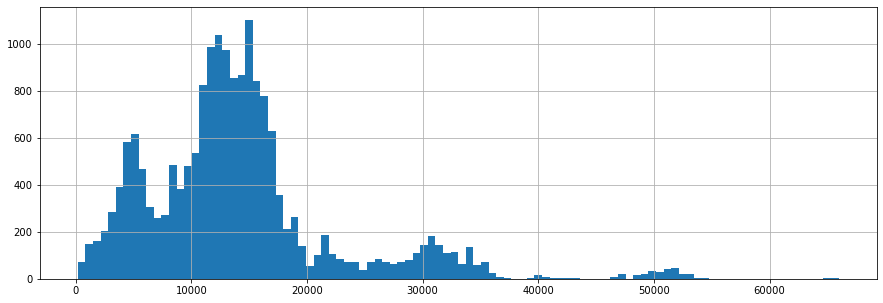

In [82]:
df['cityCenters_nearest'].hist(bins=100, figsize=(15, 5))

count    18164.000000
mean     14191.590344
std       8610.204600
min        181.000000
25%       9238.000000
50%      13100.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

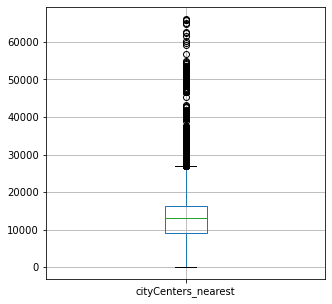

In [94]:
df.boxplot(figsize=(5, 5), column='cityCenters_nearest')
df['cityCenters_nearest'].describe()

График не очень показательный, потому что это выборка из нескольких городов. В среднем это 14191 метр, а медиана 13100

#### Расстояние до ближайшего аэропорта

<AxesSubplot:>

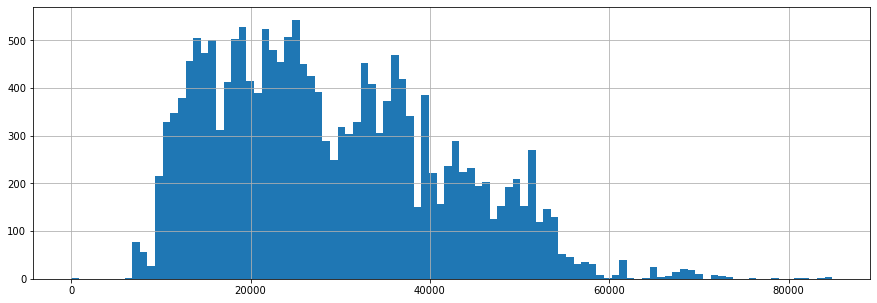

In [41]:
df['airports_nearest'].hist(bins=100, figsize=(15, 5))

count    18141.000000
mean     28793.984620
std      12633.396257
min          0.000000
25%      18582.000000
50%      26726.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64

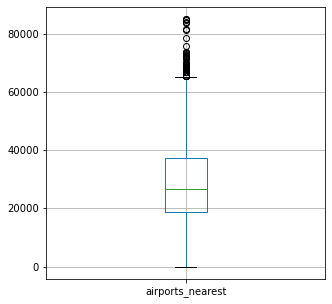

In [97]:
df.boxplot(figsize=(5, 5), column='airports_nearest')
df['airports_nearest'].describe()

В среднем это 28793 метра, а медиана 26726

#### Расстояние до ближайшего парка

<AxesSubplot:>

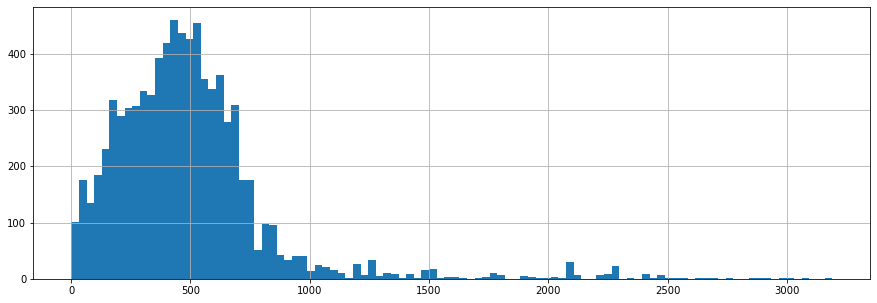

In [43]:
df['parks_nearest'].hist(bins=100, figsize=(15, 5))

count    8069.000000
mean      490.780270
std       342.455928
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

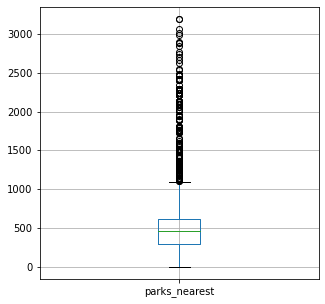

In [98]:
df.boxplot(figsize=(5, 5), column='parks_nearest')
df['parks_nearest'].describe()

В среднем это 490 метр, а медиана 455. С учетом того, что третий квартиль составляет 612 метров, можно сказать, что в принципе большинство квартир находятся в пешей доступности от парков

#### День и месяц публикации объявления

<AxesSubplot:>

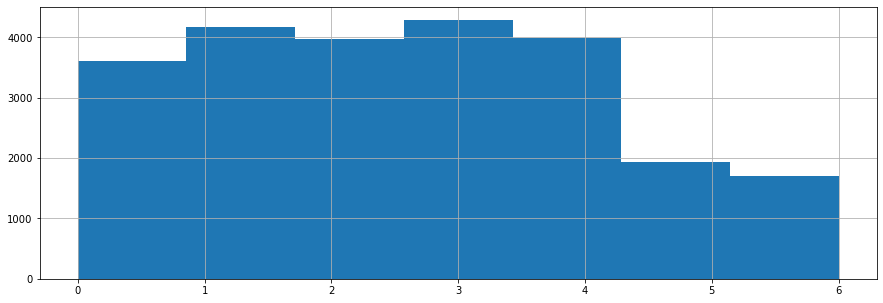

In [45]:
df['weekday'].hist(bins=7, figsize=(15, 5))

Объявления в выходные публикуются реже чем в будни. Думаю связано с тем, что продажу квартиры чаще доверяют риелторам, чем собственнники занимаются самостоятельной продажей. Соответственно, риелторы публикуют объявления в рабочее время

<AxesSubplot:>

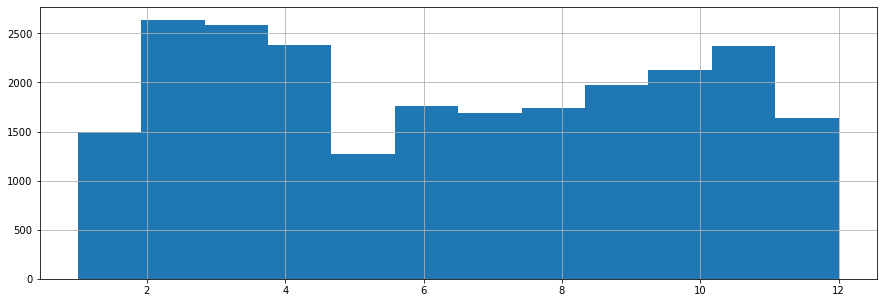

In [59]:
df['month'].hist(bins=12, figsize=(15, 5))

Заметны просадки в январе, мае и декабре. Это месяца с праздничными днями. Больше всего объявлений приходится на весну.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Все случайные величины рассмотрел правильно, молодец, что проверил статистики. Стоит всегда рассматривать данные максимально подробно, описывать статистики, предполагать почему они обладают такими значениями. Для наглядности можно построить диаграммы размаха.

Посмотрим как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

<AxesSubplot:>

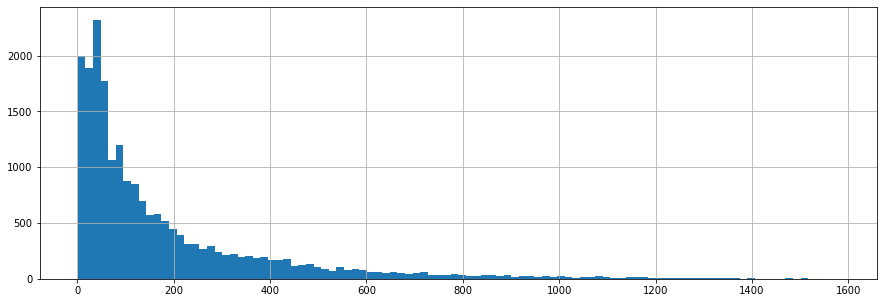

In [47]:
df['days_exposition'].hist(bins=100, figsize=(15, 5))

In [48]:
df['days_exposition'].describe()

count    20490.000000
mean       180.938995
std        219.814180
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 180 дней, однако медианой является значение в 95 дней. Быстрыми можно назвать квартиры которые были проданы в первом квартиле (до 45 дней), а небычайно долгими в 3-м (более 232 дней)

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, все верно!

#### Зависимость цены квартиры от общей площади:

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

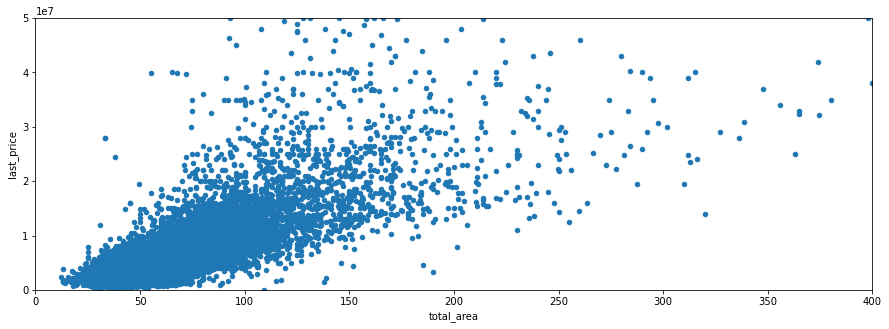

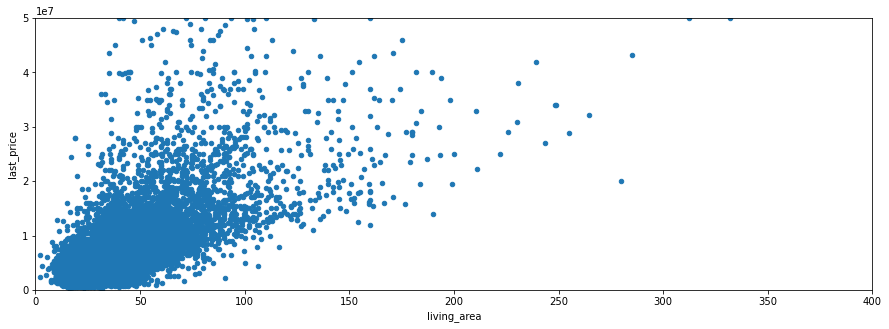

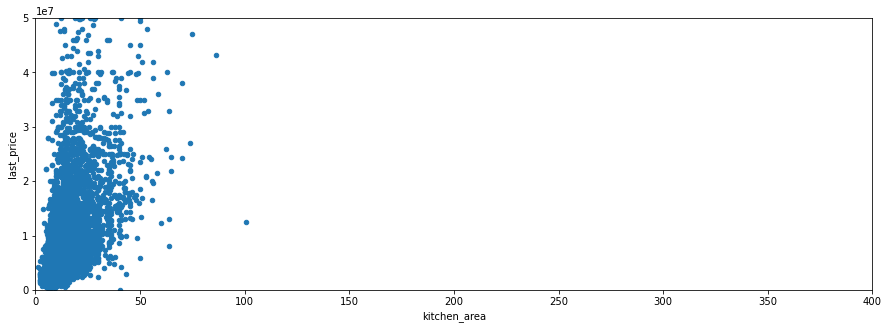

In [49]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(15, 5), xlim=(0, 400), ylim=(0, 5e7))
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(15, 5), xlim=(0, 400), ylim=(0, 5e7))
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(15, 5), xlim=(0, 400), ylim=(0, 5e7))

<AxesSubplot:xlabel='rooms_count_group'>

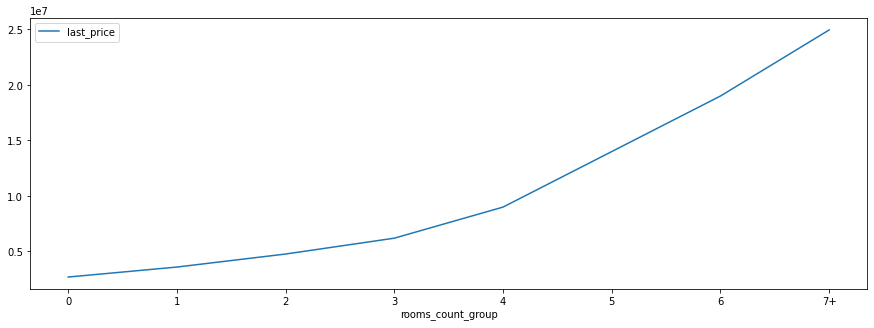

In [50]:
rooms_count_stat = pd.pivot_table(df, index='rooms_count_group', values='last_price', aggfunc='median')
rooms_count_stat.plot(figsize=(15, 5))

Ожидаемо цена растет с увеличением количества комнат

#### Зависимость цены квартиры от типа этажа:

In [51]:
pd.pivot_table(df, index='floor_group', values='last_price', aggfunc='median')

,last_price
floor_group,
другой,4850000.0
первый,3900000.0
последний,4300000.0


Стоимость квартир на первом этаже заметно ниже остальных

#### Зависимость цены квартиры от дня недели публикации объявления:

<AxesSubplot:xlabel='weekday'>

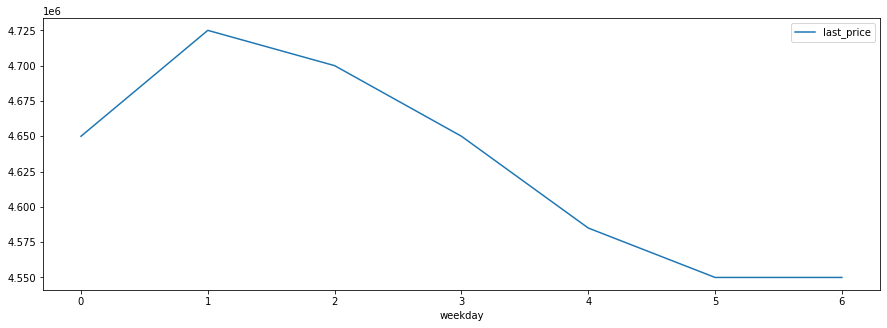

In [52]:
pd.pivot_table(df, index='weekday', values='last_price', aggfunc='median').plot(figsize=(15, 5))

Цены, в начале недели всегда выше, чем к концу недели. 

#### Зависимость цены квартиры от месяца публикации объявления:

<AxesSubplot:xlabel='month'>

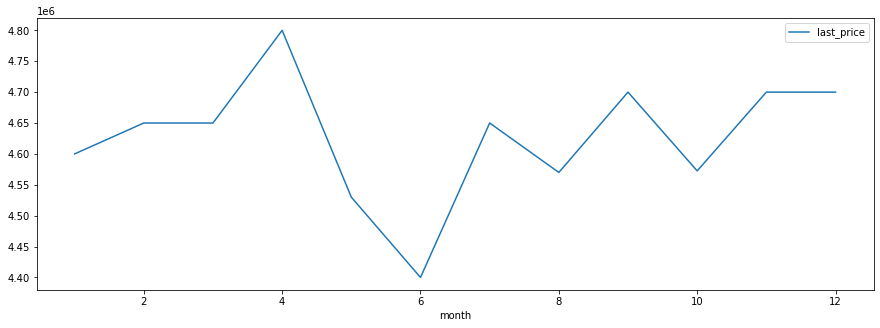

In [53]:
pd.pivot_table(df, index='month', values='last_price', aggfunc='median').plot(figsize=(15, 5))

Цены, в мае-июне ниже, чем в остальные месяцы. 

#### Зависимость цены квартиры от года публикации объявления:

<AxesSubplot:xlabel='year'>

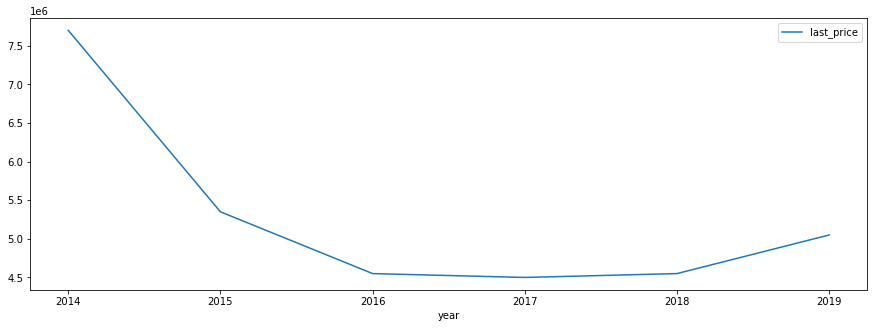

In [54]:
pd.pivot_table(df, index='year', values='last_price', aggfunc='median').plot(figsize=(15, 5))

Начиная с 2014 по 2017 год цены на квартиры снижались, после 2017 года видна тенденция на увеличение стоимости

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильные типы диаграмм подобрал для анализа зависимости, все вывод сделал верные, продолжай в том же духе!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно рассмотреть также коэффициенты корреляций между случайными величинами, для которых это будет корректно.

#### Посчитаем коэффициенты корреляции площадей и цен

In [55]:
print(f"Коэффициент корреляции общей площади и цены - {df['total_area'].corr(df['last_price'])}")
print(f"Коэффициент корреляции жилой площади и цены - {df['living_area'].corr(df['last_price'])}")
print(f"Коэффициент корреляции площади кухни и цены - {df['kitchen_area'].corr(df['last_price'])}")

Коэффициент корреляции общей площади и цены - 0.6538067139254671
Коэффициент корреляции жилой площади и цены - 0.5854041424089604
Коэффициент корреляции площади кухни и цены - 0.5148586069929717


Корреляция в 0.51-0.65 говорит о наличии связи, с ростом площади, стоимость квартиры ожидаемо растет.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [56]:
cities = (df
          .groupby('clean_name')
          .agg('count')
          .sort_values(['last_price'],ascending=False)['last_price'][:10]
          .keys())
cities_prices_per_meter = pd.pivot_table(df.query('clean_name in @cities'), index='clean_name', values='price_per_meter').sort_values(by=['price_per_meter'], ascending=False)
cities_prices_per_meter

,price_per_meter
clean_name,
Санкт-Петербург,114792.951711
Пушкин,103125.819291
Кудрово,95326.179139
Парголово,90175.913458
Мурино,86087.512050
Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68719.320400


<AxesSubplot:xlabel='clean_name'>

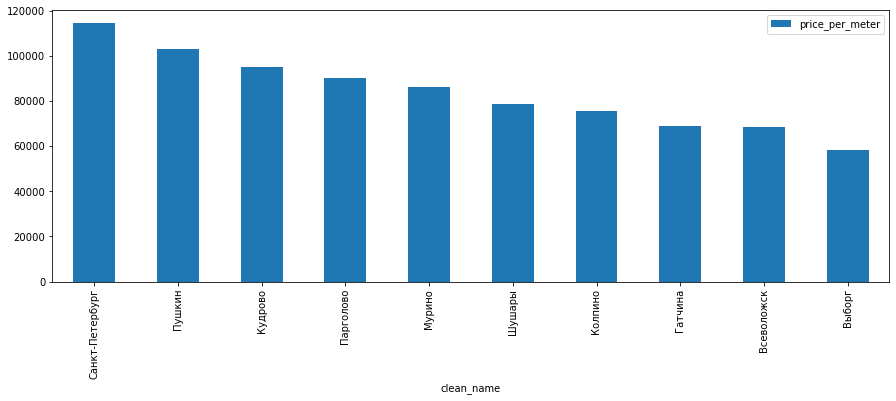

In [57]:
cities_prices_per_meter.plot(kind='bar', figsize=(15, 5))

Наиболее дорогая стоимость жилья в Санкт-Петербурге, 114'849 р. за кв. метр, наиболее доступное жилье в Выборге 58'141 р. за кв. метр

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно!

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

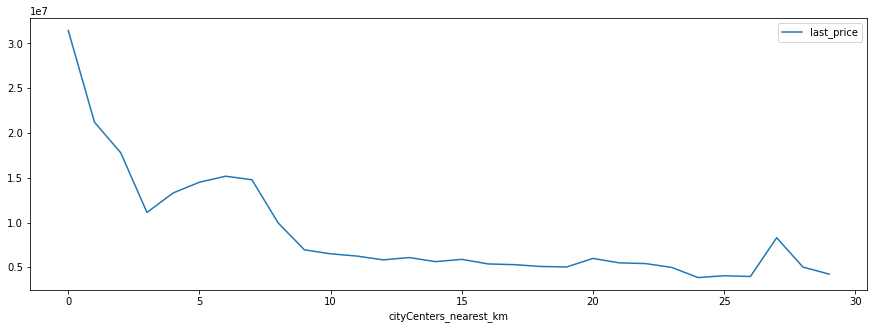

In [58]:
price_nearest_km = pd.pivot_table(df[df["clean_name"] == "Санкт-Петербург"], index='cityCenters_nearest_km', values='last_price')
price_nearest_km.plot(figsize=(15, 5))

Зависимость напоминает гиперболу с некоторыми выбросами в районе 7-го и 27-го километра, возможно на этом удалении от центра расположены элитные ЖК, которые вносят аномалии. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В данном пункте нужно рассмотреть зависимость расстояния до центра от общей стоимости квартир, а не от цены за метр квадратный.

# Вывод

1. Был выгружен датасет с более чем 23000 объявлений о продаже квартир, содержащий 21 параметр: расстояние до ближайшего аэропорта в метрах, число балконов, высота потолков, расстояние до центра города, сколько дней было размещено объявление, дата публикации, этаж, всего этажей в доме, апартаменты, площадь кухни в квадратных метрах, цена на момент снятия с публикации, жилая площадь в квадратных метрах, название населённого пункта, свободная планировка,число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма, число комнат, квартира-студия, общая площадь квартиры в квадратных метрах, число фотографий квартиры в объявлении
2. В ходе анализа датасета был выявлен ряд проблем:
    - отсутствие информации в некоторых полях, а именно: расстояние до ближайшего аэропорта в метрах, число балконов, высота потолков, расстояние до центра города, сколько дней было размещено объявление, всего этажей в доме, апартаменты, площадь кухни в квадратных метрах, жилая площадь в квадратных метрах, название населённого пункта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма
    - Неправильные типы данных в некоторых полях
    - Аномальные значения в полях количество комнат, высота потолков и количество балконов
    - Неявные дубликаты в названиях населенных пунктов
3. После устранения указанных проблем, были изучены и отмечены следующие особенности в данных:
    - Средняя жилая площадь сильно коррелирует с количеством комнат, чего нельзя сказать про общую площадь и площадь кухни
    - Половину объявлений на рынке составляют 1 и 2-хкомнатные квартиры
    - В распределении высоты потолков набляюдаем несколько вершин. Эти пики сооответсвуют стандартам потолков 2.5, 2.6, 2.7, 2.8, 3 и 3.2 метра
    - Количество этажей в доме. Наблюдается несколько пиков, соответствующих типовым домам, это 5-ти, 9-ти, 16-ти и 25-ти этажки.
    - Объявления в выходные публикуются реже чем в будни. Думаю связано с тем, что продажу квартиры чаще доверяют риелторам, чем собственнники занимаются самостоятельной продажей. Соответственно, риелторы публикуют объявления в рабочее время
    - Заметны просадки в январе, мае и декабре. Это месяца с праздничными днями. Больше всего объявлений приходится на весну
    - В среднем квартиры продаются за 180 дней, однако медианой является значение в 95 дней. Быстрыми можно назвать квартиры которые были проданы в первом квартиле (до 45 дней), а небычайно долгими в 3-м (более 232 дней)
    - Цены, в начале недели всегда выше, чем к концу недели.
    - Цены, в мае-июне ниже, чем в остальные месяцы.
    - Начиная с 2014 по 2017 год цены на квартиры снижались, после 2017 года видна тенденция на увеличение стоимости
    - Самая дорогая стоимость жилья за квадратный метр отмечается в Санкт-Петербурге и составляет 114849 р.
    - Самое доступное жилье находится в Выборге 58141 р. за кв. м. Что вдвое ниже чем в Санкт-Петербурге
    - Стоимость объектов зависит от расстояния до центра Санкт-Петербурга при удаленности до 5 км стоимость стремительно снижается. После 5 км это зависимость не так ощутима
4. Рекомендации:
    - Проанализировать данные по площади кухни. Постараться понять род зубчатой гистограммы
    - Более подробно ознакомится с причиной появления высоких цен на квартиры в районе 7-го и 27-го километра от центра Санкт-Петербурга

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложил все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовал всем этапам выполнения задания и справился почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смог сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно корректно обработать все признаки.
* Рассмотри коэффициенты корреляций между ценой и другими параметрами.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉